In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plot the visuals in ipython
%matplotlib inline


In [10]:
df = pd.read_json("data/linreg.json" )
df.columns = ["hours", "score"]
x = df["hours"]
y = df["score"]


In [11]:
X = x
X2 = np.column_stack((X, X**2))
X3 = np.column_stack((X, X**2, X**3))
X1 = sm.add_constant(X)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)

est1 = sm.OLS(y, X1).fit()
est2 = sm.OLS(y, X2).fit()
est3 = sm.OLS(y, X3).fit()

xx = np.arange(24)

r1 = "r2 = %.4f" % est1.rsquared
r2 = "r2 = %.4f" % est2.rsquared
r3 = "r2 = %.4f" % est3.rsquared

p = est1.params
y_lin = p[0] + p[1]*xx

p = est2.params
y_p2 = p[0] + p[1]*xx + p[2]*xx**2

p = est3.params
y_p3 = p[0] + p[1]*xx + p[2]*xx**2 + p[3]*xx**3

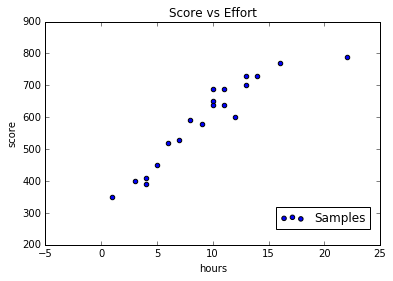

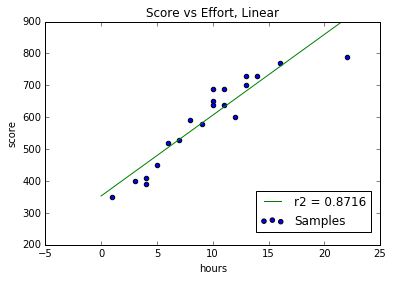

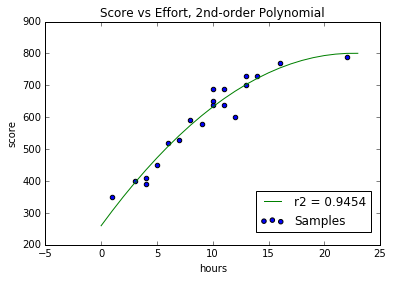

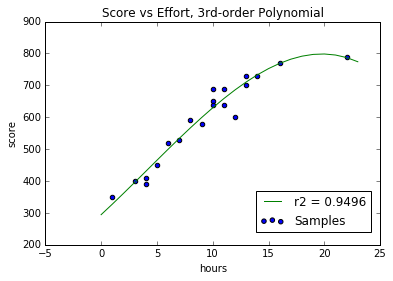

In [15]:
fig = plt.figure()
fig.set_size_inches(16, 12)
ax = df.plot(kind='scatter', x='hours', y='score',label='Samples')
ax.set_ylim([200,900])
ax.legend(loc='center left', bbox_to_anchor=(0.67, 0.12))
plt.title("Score vs Effort")
plt.savefig("img/linreg-no.png", dpi=200)

fig = plt.figure()
fig.set_size_inches(16, 12)
ax = df.plot(kind='scatter', x='hours', y='score',label='Samples')
ax.set_ylim([200,900])
ax.plot(xx,y_lin, '-', color="green", label=r1)
ax.legend(loc='center left', bbox_to_anchor=(0.61, 0.15))
plt.title("Score vs Effort, Linear")
plt.savefig("img/linreg-p1.png", dpi=200)

fig = plt.figure()
fig.set_size_inches(16, 12)
ax = df.plot(kind='scatter', x='hours', y='score',label='Samples')
ax.set_ylim([200,900])
ax.plot(xx,y_p2, '-', color="green", label=r2)
ax.legend(loc='center left', bbox_to_anchor=(0.61, 0.15))
plt.title("Score vs Effort, 2nd-order Polynomial")
plt.savefig("img/linreg-p2.png", dpi=200)

fig = plt.figure()
fig.set_size_inches(16, 12)
ax = df.plot(kind='scatter', x='hours', y='score',label='Samples')
ax.set_ylim([200,900])
ax.plot(xx,y_p3, '-', color="green", label=r3)
ax.legend(loc='center left', bbox_to_anchor=(0.61, 0.15))
plt.title("Score vs Effort, 3rd-order Polynomial")
plt.savefig("img/linreg-p3.png", dpi=200)
